In [1]:
import opendatasets as od

import os
# os.environ["PYARROW_IGNORE_TIMEZONE"] = "1"

import pandas as pd
# import pyspark.pandas as ps
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="white", palette="muted", color_codes=True)

import warnings
warnings.filterwarnings("ignore")

plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 20

In [2]:
# od.download("https://www.kaggle.com/competitions/store-sales-time-series-forecasting/data")

In [3]:
folder = "store-sales-time-series-forecasting"

datasets = [folder + "/" + f for f in os.listdir('store-sales-time-series-forecasting')]

In [4]:
datasets

['store-sales-time-series-forecasting/holidays_events.csv',
 'store-sales-time-series-forecasting/oil.csv',
 'store-sales-time-series-forecasting/sample_submission.csv',
 'store-sales-time-series-forecasting/stores.csv',
 'store-sales-time-series-forecasting/test.csv',
 'store-sales-time-series-forecasting/train.csv',
 'store-sales-time-series-forecasting/transactions.csv']

#### holidays_events

In [5]:
holiday_df = pd.read_csv(datasets[0], parse_dates = ["date"])

In [6]:
for col in holiday_df.columns[1:]:
    print(col)
    print("*" * len(col))
    print(holiday_df[col].value_counts())
    print()

type
****
Holiday       221
Event          56
Additional     51
Transfer       12
Bridge          5
Work Day        5
Name: type, dtype: int64

locale
******
National    174
Local       152
Regional     24
Name: locale, dtype: int64

locale_name
***********
Ecuador                           174
Quito                              13
Riobamba                           12
Guaranda                           12
Latacunga                          12
Ambato                             12
Guayaquil                          11
Cuenca                              7
Ibarra                              7
Salinas                             6
Loja                                6
Santa Elena                         6
Santo Domingo de los Tsachilas      6
Quevedo                             6
Manta                               6
Esmeraldas                          6
Cotopaxi                            6
El Carmen                           6
Santo Domingo                       6
Machala             

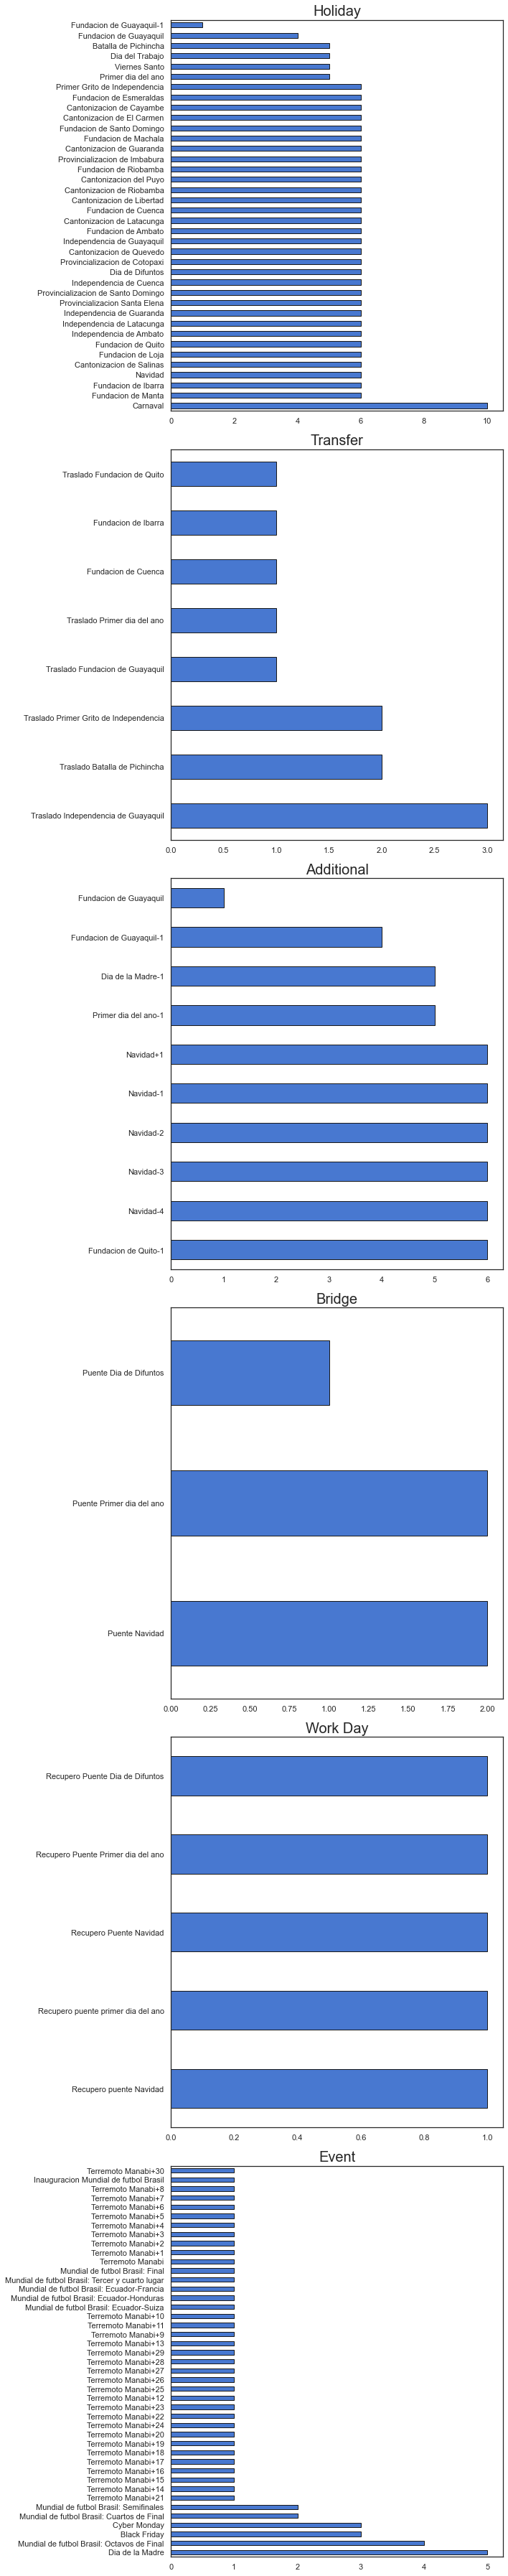

In [7]:
fig, axes = plt.subplots(6, 1, figsize = (10, 50), tight_layout = True)

for name, ax in zip(holiday_df["type"].unique(), axes.flatten()):
    
    holiday_df.loc[holiday_df["type"].eq(name), "description"].value_counts().\
    plot(kind = "barh", ax=ax, edgecolor = "k");
    
    ax.set_title(name)

### oil

In [8]:
oil_df = pd.read_csv(datasets[1], parse_dates = ["date"], index_col = "date")

In [9]:
oil_df.info() # some missing values exists

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1218 entries, 2013-01-01 to 2017-08-31
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dcoilwtico  1175 non-null   float64
dtypes: float64(1)
memory usage: 19.0 KB


In [10]:
oil_df.isna().sum()

dcoilwtico    43
dtype: int64

In [11]:
oil_df.index.freq = "B"

In [12]:
oil_df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-07', '2013-01-08', '2013-01-09', '2013-01-10',
               '2013-01-11', '2013-01-14',
               ...
               '2017-08-18', '2017-08-21', '2017-08-22', '2017-08-23',
               '2017-08-24', '2017-08-25', '2017-08-28', '2017-08-29',
               '2017-08-30', '2017-08-31'],
              dtype='datetime64[ns]', name='date', length=1218, freq='B')

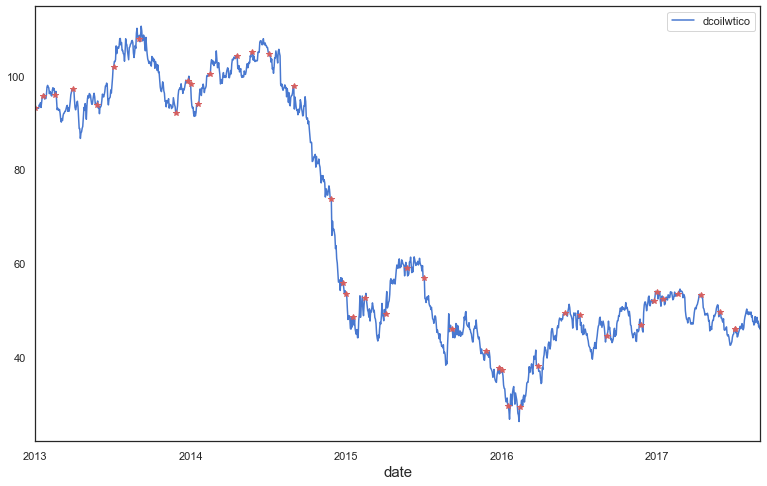

In [13]:
oil_df_imputed = oil_df.fillna(method  = "ffill").fillna(method  = "bfill")

ax = oil_df_imputed.plot(figsize = (13, 8), linestyle="-");
oil_df_imputed[oil_df.isnull()].plot(ax=ax, legend=None, marker="*", color="r", linestyle="-");

### stores

In [14]:
store_df = pd.read_csv(datasets[3])
store_df.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [15]:
for col in store_df.columns[1:]:
    print(col)
    print("*" * len(col))
    print(store_df[col].value_counts())
    print()

city
****
Quito            18
Guayaquil         8
Cuenca            3
Santo Domingo     3
Manta             2
Latacunga         2
Machala           2
Ambato            2
Quevedo           1
Esmeraldas        1
Loja              1
Libertad          1
Playas            1
Daule             1
Babahoyo          1
Salinas           1
Puyo              1
Guaranda          1
Ibarra            1
Riobamba          1
Cayambe           1
El Carmen         1
Name: city, dtype: int64

state
*****
Pichincha                         19
Guayas                            11
Santo Domingo de los Tsachilas     3
Azuay                              3
Manabi                             3
Cotopaxi                           2
Tungurahua                         2
Los Rios                           2
El Oro                             2
Chimborazo                         1
Imbabura                           1
Bolivar                            1
Pastaza                            1
Santa Elena                    

### transactions

In [16]:
trnst_df = pd.read_csv(datasets[-1])
trnst_df.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [17]:
trnst_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


In [18]:
np.sort(trnst_df["store_nbr"].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54], dtype=int64)

In [19]:
np.sort(store_df["store_nbr"].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54], dtype=int64)

In [20]:
print(np.setdiff1d(trnst_df["store_nbr"].unique(), store_df["store_nbr"].unique()))
print(np.setdiff1d(store_df["store_nbr"].unique(), trnst_df["store_nbr"].unique()))

[]
[]


In [21]:
store_trnst_df = trnst_df.merge(store_df, how = "left", on = "store_nbr")
store_trnst_df

,date,store_nbr,transactions,city,state,type,cluster
0,2013-01-01,25,770,Salinas,Santa Elena,D,1
1,2013-01-02,1,2111,Quito,Pichincha,D,13
2,2013-01-02,2,2358,Quito,Pichincha,D,13
3,2013-01-02,3,3487,Quito,Pichincha,D,8
4,2013-01-02,4,1922,Quito,Pichincha,D,9
...,...,...,...,...,...,...,...
83483,2017-08-15,50,2804,Ambato,Tungurahua,A,14
83484,2017-08-15,51,1573,Guayaquil,Guayas,A,17
83485,2017-08-15,52,2255,Manta,Manabi,A,11
83486,2017-08-15,53,932,Manta,Manabi,D,13


In [22]:
store_groups = \
store_trnst_df[["store_nbr", "type"]].drop_duplicates().sort_values("type", ignore_index = True)

store_groups

,store_nbr,type
0,52,A
1,51,A
2,50,A
3,49,A
4,48,A
5,47,A
6,46,A
7,45,A
8,44,A
9,21,B


In [23]:
store_trnst_df["date"] = pd.to_datetime(store_trnst_df["date"])

In [24]:
store_trnst_df = store_trnst_df.set_index("date")

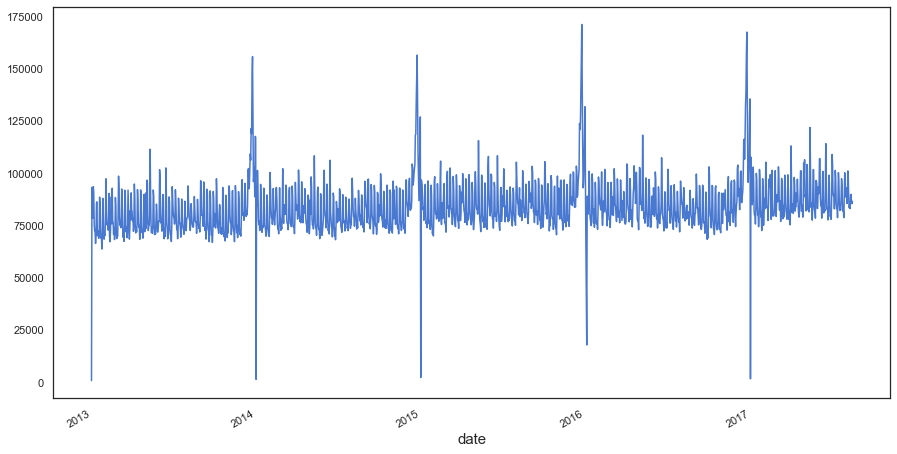

In [25]:
total_daily_trns = \
store_trnst_df.groupby(store_trnst_df.index)["transactions"].sum()

total_daily_trns.plot(figsize = (15, 8));

In [26]:
total_daily_trns[total_daily_trns.values < 25000]

date
2013-01-01      770
2014-01-01     1327
2015-01-01     2202
2016-01-04    17829
2017-01-01     1642
Name: transactions, dtype: int64

In [27]:
total_daily_trns[total_daily_trns.values > 150000]

date
2013-12-24    155846
2014-12-24    156546
2015-12-23    153338
2015-12-24    171169
2016-12-23    156932
2016-12-24    167542
Name: transactions, dtype: int64

In [28]:
del store_df, trnst_df

### Train

In [29]:
# train_df = ps.read_csv(datasets[5])
# ps.to_datetime(train_df["date"])

In [30]:
train_df = pd.read_csv(datasets[5], parse_dates=["date"]).drop("id", axis = 1)

In [31]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 5 columns):
 #   Column       Dtype         
---  ------       -----         
 0   date         datetime64[ns]
 1   store_nbr    int64         
 2   family       object        
 3   sales        float64       
 4   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 114.5+ MB


In [32]:
train_df.isnull().sum()

date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [33]:
# train_df["store_nbr"] = train_df["store_nbr"].astype("int8")
# train_df["onpromotion"] = train_df["onpromotion"].astype("int8")
# train_df["sales"] = train_df["sales"].astype("float64")

In [34]:
train_df["family"].unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

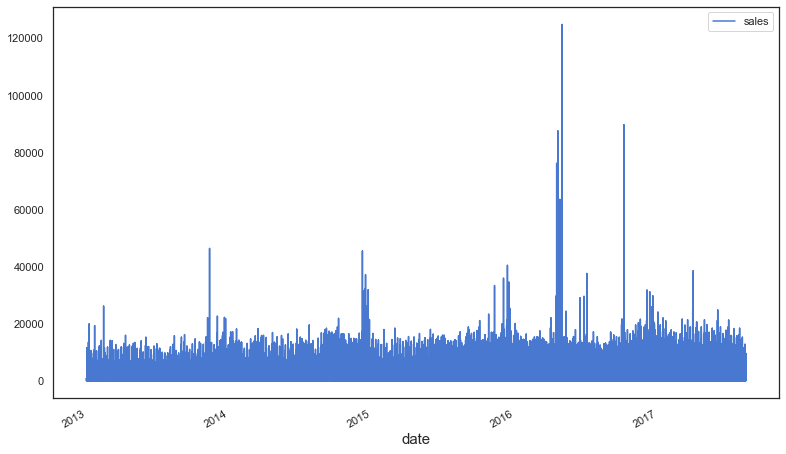

In [35]:
train_df.set_index("date").plot(y = "sales", figsize = (13, 8));

In [36]:
train_df["date"].dt.day

0           1
1           1
2           1
3           1
4           1
           ..
3000883    15
3000884    15
3000885    15
3000886    15
3000887    15
Name: date, Length: 3000888, dtype: int64

In [37]:
train_df["day"] = train_df["date"].dt.day
train_df["month"] = train_df["date"].dt.month
train_df["year"] = train_df["date"].dt.year
train_df["day_of_week"] = train_df["date"].dt.dayofweek
train_df["day_of_year"] = train_df["date"].dt.dayofyear
train_df["is_weekend"] = train_df["date"].dt.dayofweek > 4

train_df.head()

,date,store_nbr,family,sales,onpromotion,day,month,year,day_of_week,day_of_year,is_weekend
0,2013-01-01,1,AUTOMOTIVE,0.0,0,1,1,2013,1,1,False
1,2013-01-01,1,BABY CARE,0.0,0,1,1,2013,1,1,False
2,2013-01-01,1,BEAUTY,0.0,0,1,1,2013,1,1,False
3,2013-01-01,1,BEVERAGES,0.0,0,1,1,2013,1,1,False
4,2013-01-01,1,BOOKS,0.0,0,1,1,2013,1,1,False


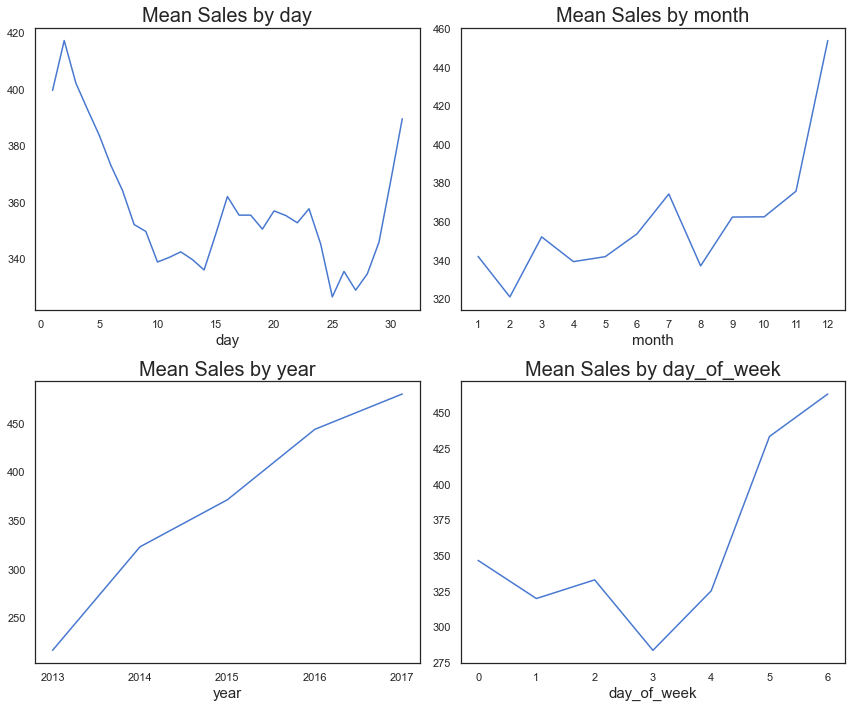

In [38]:
fig, axes = plt.subplots(2, 2, tight_layout = True, figsize = (12, 10))

for col, ax in zip(["day", "month", "year", "day_of_week"], axes.flatten()):
    
    train_df.groupby(col)["sales"].mean().plot(ax = ax);
    ax.set_title(f"Mean Sales by {col}");
    
    if col in ["year", "month"]:
        ax.set_xticks(train_df.groupby(col)["sales"].mean().index)

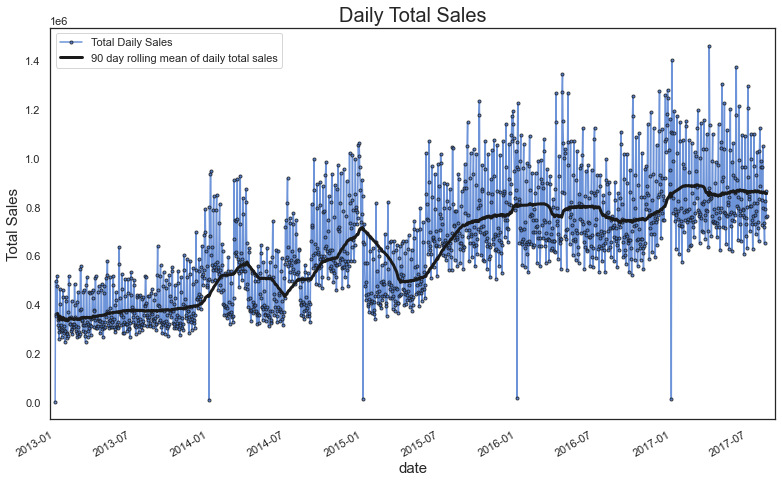

In [39]:
total_daily_sales = train_df.groupby("date")["sales"].sum()

ax = total_daily_sales.plot(
    y = "sales", 
    figsize = (13, 8), 
    marker = ".", 
    alpha = 0.8, 
    mec='k', 
    legend = None
);

total_daily_sales.rolling(window = 90, min_periods = 7).mean().\
plot(ax=ax, lw = 3, color = "k", legend = None);

plt.legend(labels = ["Total Daily Sales", "90 day rolling mean of daily total sales"])

plt.title("Daily Total Sales");
plt.ylabel("Total Sales");
plt.xlim("2012-12-20", "2017-09-05");

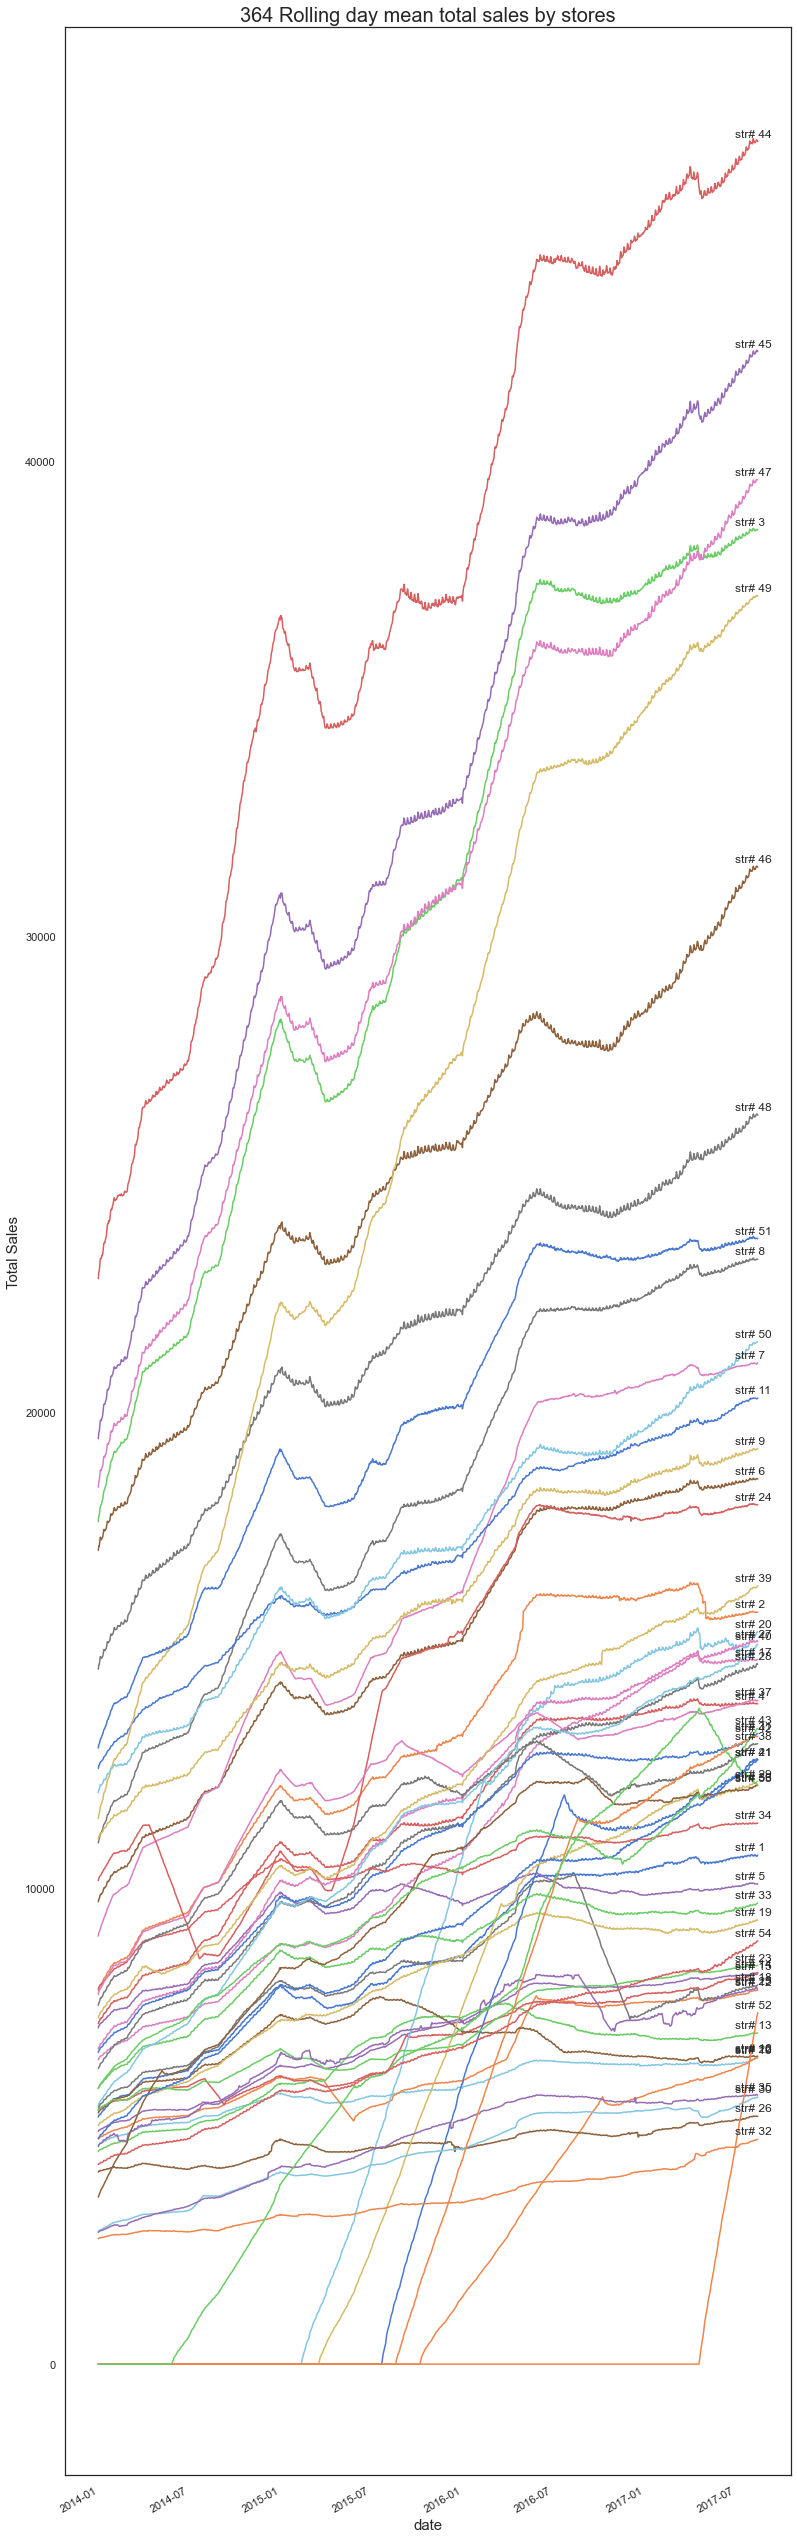

In [40]:
store_total_dly_sales = \
train_df.groupby(["store_nbr", "date"], as_index = False)["sales"].sum()

fig, ax = plt.subplots(figsize = (13, 50))
roll_period = 365

for store in store_total_dly_sales["store_nbr"].unique():
    
    roll_mean = \
    store_total_dly_sales.query(f"store_nbr == {store}").set_index("date").\
    rolling(roll_period)["sales"].mean().to_frame(f"{store}")
    
    roll_mean.plot(ax=ax, legend = None);
    
    xy_coord = roll_mean.reset_index().iloc[-1, :].values
    
    ax.annotate(
        text = f"str# {store}", 
        xy = xy_coord, 
        xytext = xy_coord+np.array([-pd.Timedelta("45 days"), 100])
    );
    
plt.ylabel("Total Sales");
plt.title("364 Rolling day mean total sales by stores");

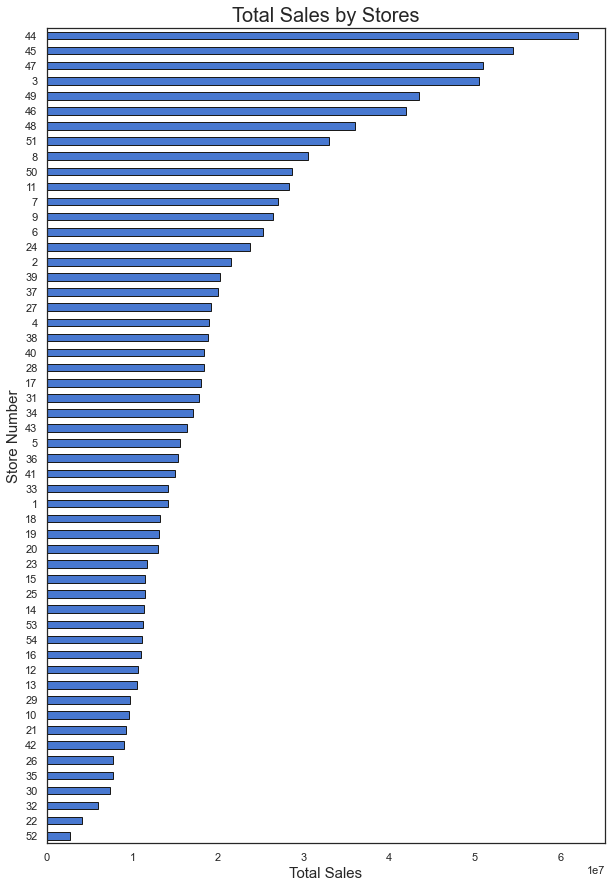

In [41]:
fig, ax = plt.subplots(figsize = (10, 15))

train_df.groupby("store_nbr")["sales"].sum().sort_values().\
plot(kind = "barh", ax = ax, edgecolor = "k", title = "Total Sales by Stores");

ax.set_xlabel("Total Sales");
ax.set_ylabel("Store Number");

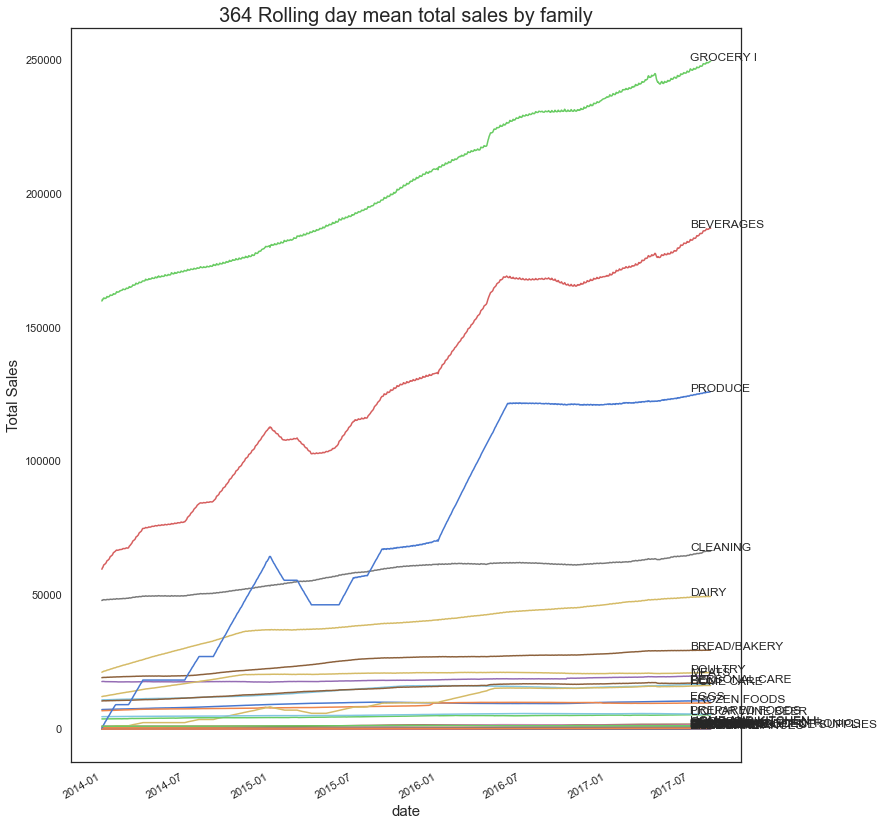

In [42]:
family_total_dly_sales = \
train_df.groupby(["family", "date"], as_index = False)["sales"].sum()

fig, ax = plt.subplots(figsize = (12, 15))
roll_period = 365

for prd in family_total_dly_sales["family"].unique():
    
    roll_mean = \
    family_total_dly_sales.query(f"family == '{prd}'").set_index("date").\
    rolling(roll_period)["sales"].mean().to_frame(f"{prd}")
    
    roll_mean.plot(ax=ax, legend = None);
    
    xy_coord = roll_mean.reset_index().iloc[-1, :].values
    
    ax.annotate(
        text = prd, 
        xy = xy_coord, 
        xytext = xy_coord+np.array([-pd.Timedelta("45 days"), 100])
    );
    
plt.ylabel("Total Sales");
plt.title("364 Rolling day mean total sales by family");

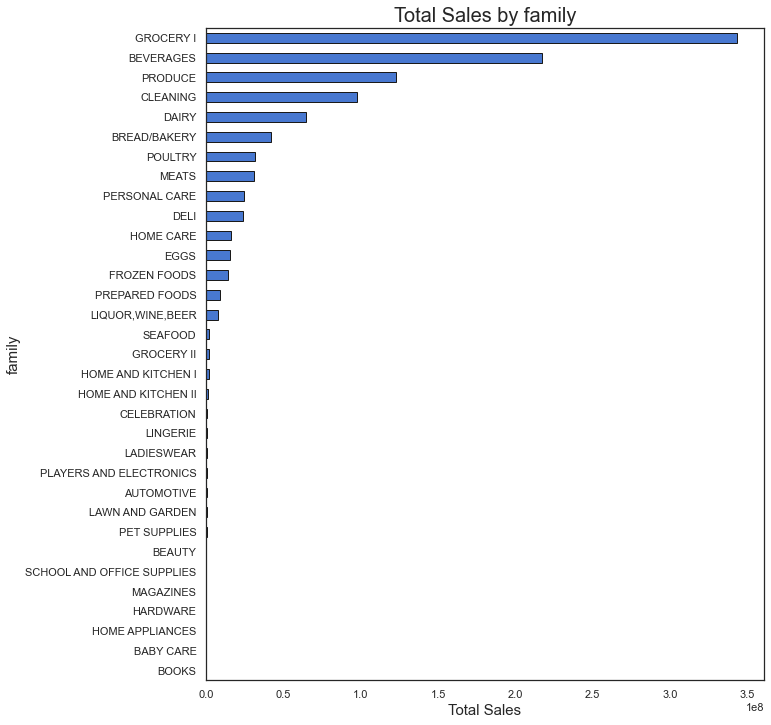

In [43]:
fig, ax = plt.subplots(figsize = (10, 12))

train_df.groupby("family")["sales"].sum().sort_values().\
plot(kind = "barh", ax = ax, edgecolor = "k", title = "Total Sales by family");

ax.set_xlabel("Total Sales");
ax.set_ylabel("family");

# Visualizing Total Sales by type of days

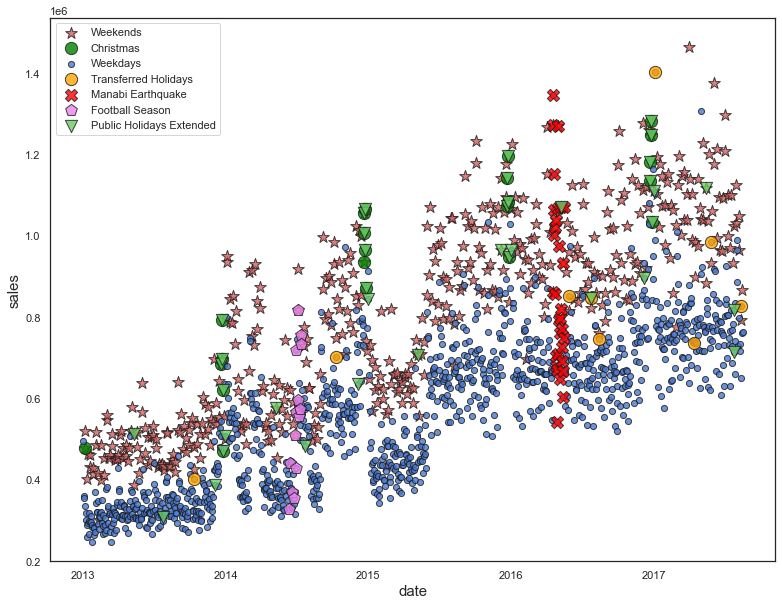

In [139]:
weekends = \
train_df.loc[train_df["is_weekend"], "date"].values

transfer_dates = \
set(holiday_df.loc[holiday_df["type"].eq("Transfer"), "date"])

earthquake = \
set(holiday_df.loc[holiday_df["description"].str.contains(r'Terremoto Manabi'), "date"])

futbol = \
set(holiday_df.loc[holiday_df["description"].str.contains(r'futbol'), "date"])

add_holidays = \
set(holiday_df.loc[holiday_df["type"].eq("Additional"), "date"])

christmas = \
set(holiday_df.loc[holiday_df["description"].str.contains(r'navidad', case = False), "date"])


fig, ax = plt.subplots(figsize = (13, 10))

args = dict(x = "date", y = "sales", kind = "scatter", edgecolor = "k", ax = ax, alpha = 0.8, s = 150)

total_daily_sales[total_daily_sales.index.isin(weekends)].reset_index().\
plot(**args, marker = "*", color = "r", label = "Weekends");

total_daily_sales[total_daily_sales.index.isin(christmas)].reset_index().\
plot(**args, color = "green", label = "Christmas");

total_daily_sales[~total_daily_sales.index.isin(weekends) & 
                  ~total_daily_sales.index.isin(christmas)].reset_index().\
plot(**args, color = "b", label = "Weekdays", marker = ".");

total_daily_sales[total_daily_sales.index.isin(transfer_dates)].reset_index().\
plot(**args, color = "orange", label = "Transferred Holidays");

total_daily_sales[total_daily_sales.index.isin(earthquake)].reset_index().\
plot(**args, color = "red", marker = "X", label = "Manabi Earthquake");

total_daily_sales[total_daily_sales.index.isin(futbol)].reset_index().\
plot(**args, color = "violet", marker = "p", label = "Football Season");

total_daily_sales[total_daily_sales.index.isin(add_holidays)].reset_index().\
plot(**args, color = "g", marker = "v", label = "Public Holidays Extended");

ax.set_ylim(0.2*10**6); #

In [ ]:
# Events
# Christmas

In [167]:
train_df["day"].between(21, 26) & train_df["month"].eq(12)

0          False
1          False
2          False
3          False
4          False
           ...  
3000883    False
3000884    False
3000885    False
3000886    False
3000887    False
Length: 3000888, dtype: bool

In [171]:
def is_chistmas(df):
    return df["day"].between(21, 26) & df["month"].eq(12)

In [172]:
is_chistmas(train_df)

0          False
1          False
2          False
3          False
4          False
           ...  
3000883    False
3000884    False
3000885    False
3000886    False
3000887    False
Length: 3000888, dtype: bool

In [182]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import make_pipeline



trnfr = FunctionTransformer(is_chistmas)

In [185]:
pipe = make_pipeline((trnfr))

In [186]:
pipe.fit_transform(train_df)

0          False
1          False
2          False
3          False
4          False
           ...  
3000883    False
3000884    False
3000885    False
3000886    False
3000887    False
Length: 3000888, dtype: bool